<a href="https://colab.research.google.com/github/Preethijazzy16/ML_PROJECTS/blob/main/InsuranceCost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA and Hypothesis Testing for Insurance Cost Prediction**


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('/content/insurance.csv')

print(df.head(10))

# Display basic information
print(df.info())
print(df.describe())

# Data Types and Missing Values
print(df.dtypes)
print(df.isnull().sum())

   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   
5   30         0                      0               0                   0   
6   33         0                      0               0                   0   
7   23         0                      0               0                   0   
8   48         1                      0               0                   0   
9   38         0                      0               0                   0   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     

Distribution Analysis

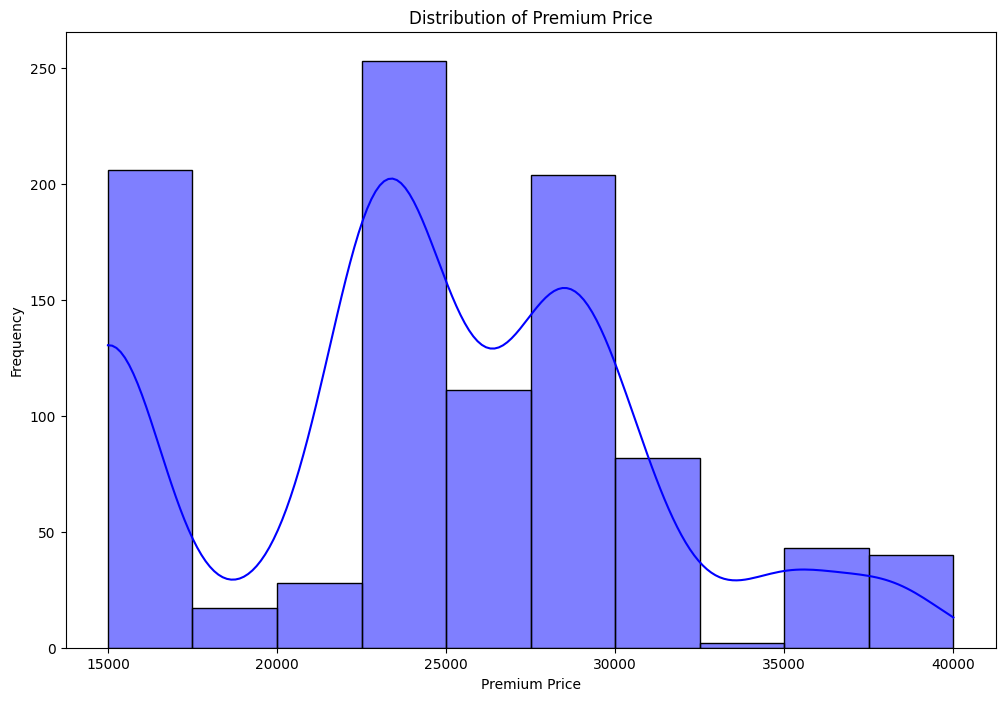

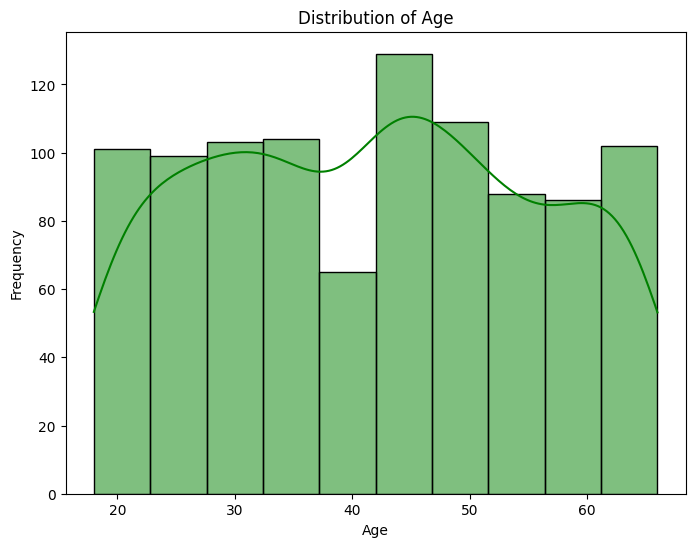

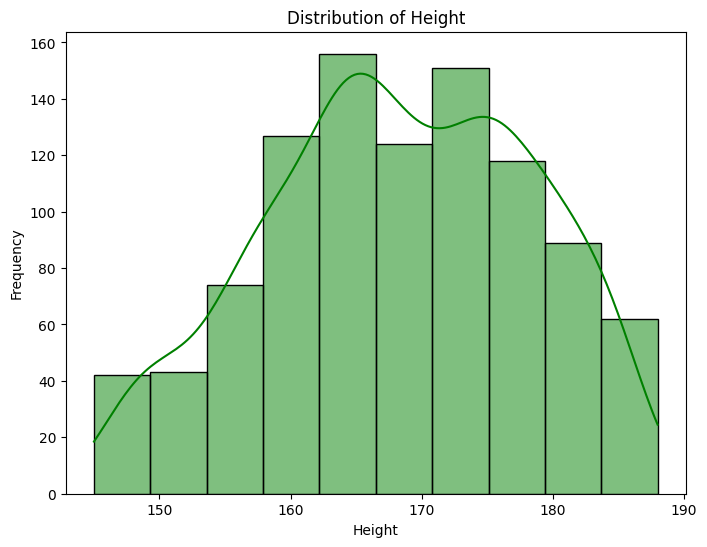

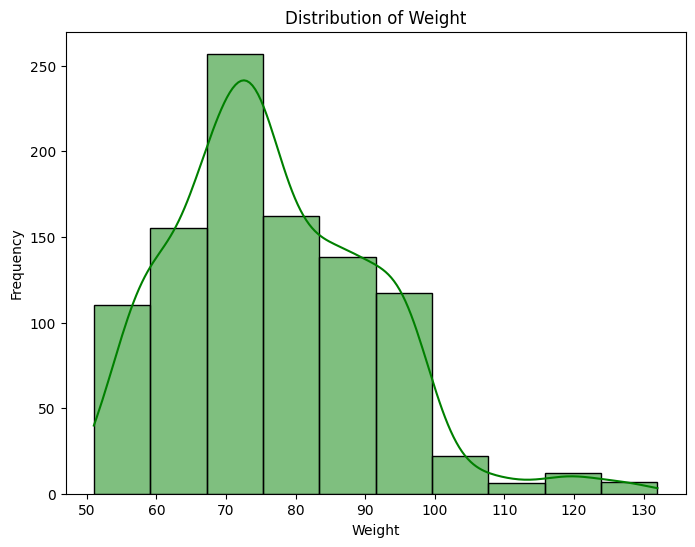

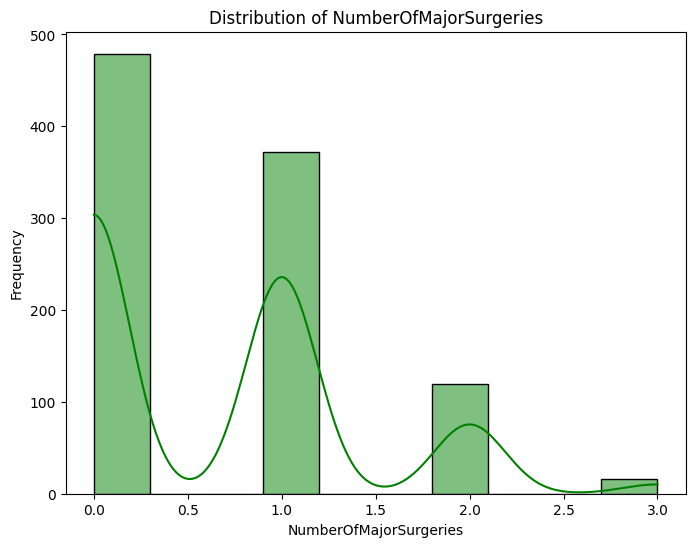

In [2]:
# Distribution Analysis

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot histogram of Premium Prices
sns.histplot(df["PremiumPrice"], kde=True, color="blue", bins=10)
plt.title('Distribution of Premium Price')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')
plt.show()

# Plot histograms for other numerical variables
num_cols = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=10, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Correlation Analysis

Generate a correlation matrix and heatmap to visualize the relationships between all numerical variables. Focus on premium prices and potential predictors.

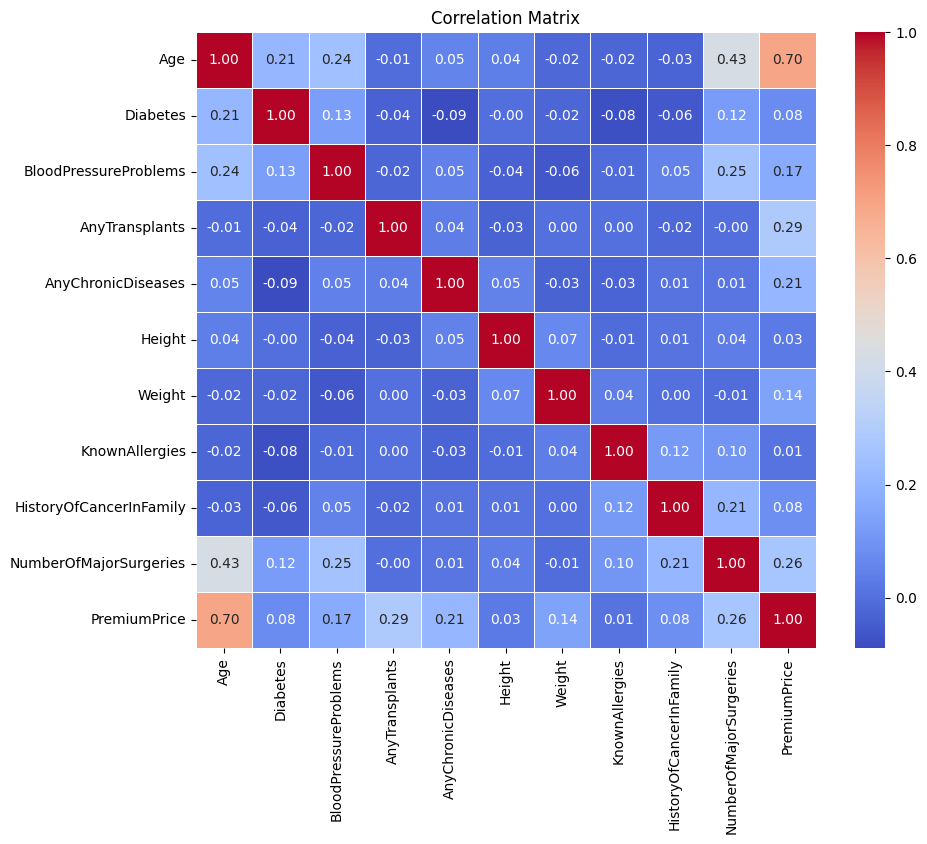

In [3]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Focus on Premium Price correlations
premium_corr = corr_matrix["PremiumPrice"].sort_values(ascending=False)
print("Correlation of Premium Price with other variables:")
print(premium_corr)


Outlier Detection
Identify outliers in key numerical variables using the IQR (Interquartile Range) method and visualize the impact.

Outliers in Premium Price:
     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
204   27         0                      1               0                   0   
295   64         1                      1               0                   1   
926   24         0                      1               0                   0   
928   19         0                      0               0                   0   
976   21         0                      1               0                   0   
984   47         1                      1               0                   0   

     Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
204     159     120               1                        1   
295     163      91               0                        0   
926     159      67               0                        0   
928     171      67               0                        0   
976     155      74               0                        0   
984     158      73  

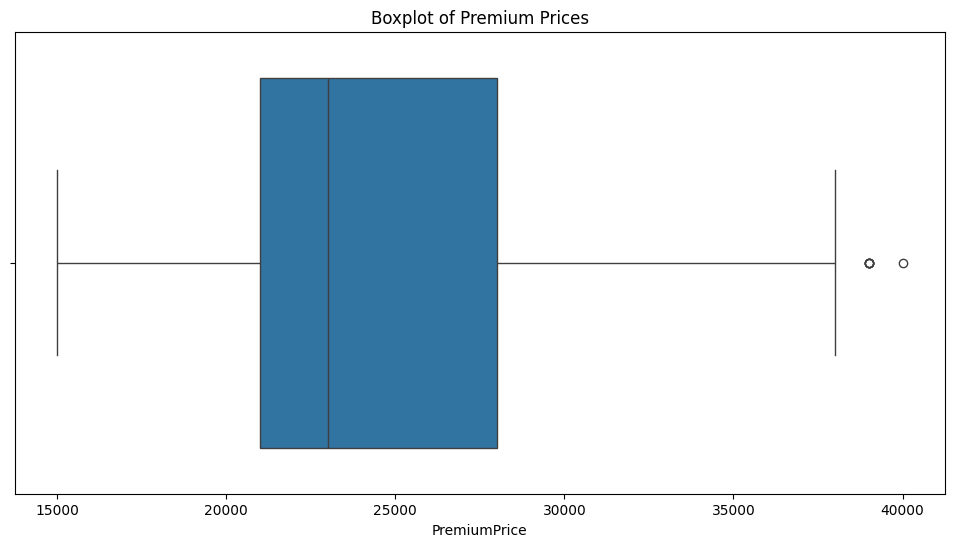

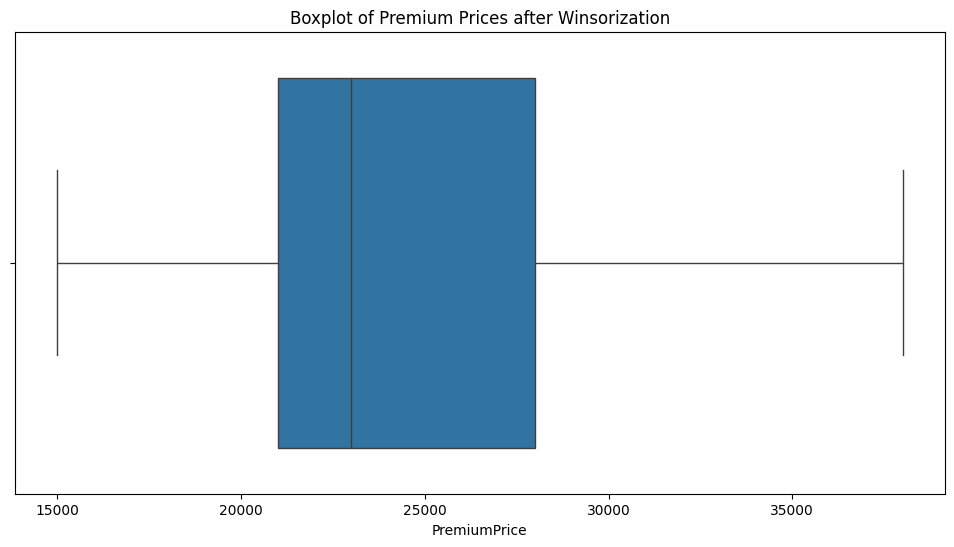

In [4]:
# Define a function for detecting outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check for outliers in PremiumPrice
outliers = detect_outliers(df, 'PremiumPrice')
print("Outliers in Premium Price:")
print(outliers)

# Plot the distribution of PremiumPrice with and without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['PremiumPrice'])
plt.title('Boxplot of Premium Prices')
plt.show()

# Handle outliers (Winsorization)
from scipy.stats import mstats
df['PremiumPrice'] = mstats.winsorize(df['PremiumPrice'], limits=[0.01, 0.01])

# Plot after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['PremiumPrice'])
plt.title('Boxplot of Premium Prices after Winsorization')
plt.show()


 Hypothesis Testing
T-test (Diabetes vs. No Diabetes)

In [5]:
from scipy import stats

# Perform a t-test for PremiumPrice between Diabetes and Non-Diabetes
diabetic = df[df["Diabetes"] == 1]["PremiumPrice"]
non_diabetic = df[df["Diabetes"] == 0]["PremiumPrice"]

t_stat, p_val = stats.ttest_ind(diabetic, non_diabetic, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("✅ Significant difference in Premium Prices between Diabetic and Non-Diabetic individuals")
else:
    print("❌ No significant difference in Premium Prices")


T-statistic: 2.4550, P-value: 0.0143
✅ Significant difference in Premium Prices between Diabetic and Non-Diabetic individuals


ANOVA (Premium Price Across Number of Major Surgeries)

In [6]:
# Perform ANOVA to check if PremiumPrice varies by NumberOfMajorSurgeries
anova_groups = [df[df["NumberOfMajorSurgeries"] == cat]["PremiumPrice"] for cat in df["NumberOfMajorSurgeries"].unique()]
anova_stat, anova_p = stats.f_oneway(*anova_groups)

print(f"ANOVA Statistic: {anova_stat:.4f}, P-value: {anova_p:.4f}")
if anova_p < 0.05:
    print("✅ Significant difference in Premium Prices across Surgery groups")
else:
    print("❌ No significant difference in Premium Prices across Surgery groups")


ANOVA Statistic: 26.1641, P-value: 0.0000
✅ Significant difference in Premium Prices across Surgery groups


Chi-Square Test (Any Chronic Diseases vs. History of Cancer in Family)

In [7]:
# Perform Chi-Square test between AnyChronicDiseases and HistoryOfCancerInFamily
contingency_table = pd.crosstab(df["AnyChronicDiseases"], df["HistoryOfCancerInFamily"])
chi2_stat, chi2_p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat:.4f}, P-value: {chi2_p:.4f}")
if chi2_p < 0.05:
    print("✅ Significant association between Chronic Disease and History of Cancer in Family")
else:
    print("❌ No significant association between Chronic Disease and History of Cancer in Family")


Chi-square Statistic: 0.0206, P-value: 0.8858
❌ No significant association between Chronic Disease and History of Cancer in Family


Linear Regression (Predicting Premium Prices)

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     347.6
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          9.18e-154
Time:                        07:20:33   Log-Likelihood:                -9657.0
No. Observations:                 986   AIC:                         1.932e+04
Df Residuals:                     982   BIC:                         1.934e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5937

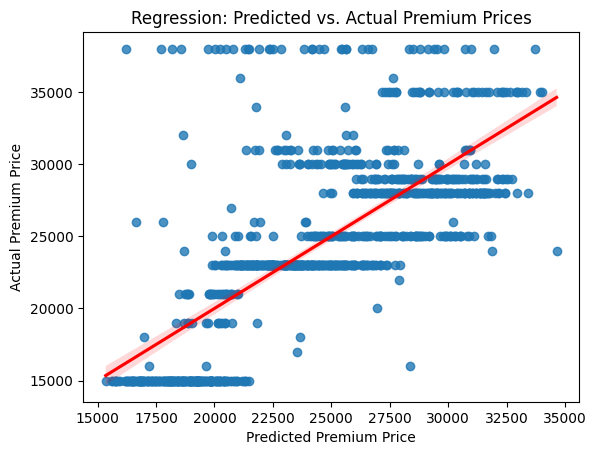

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define predictors and target
predictors = ["Age", "Weight", "NumberOfMajorSurgeries"]
target = "PremiumPrice"
df = df.dropna(subset=[target] + predictors)  # Drop rows with missing values

# Fit regression model
formula = f"PremiumPrice ~ {' + '.join(predictors)}"
model = smf.ols(formula=formula, data=df).fit()

# Display regression summary
print(model.summary())

# Visualize regression predictions vs actual values
sns.regplot(x=model.fittedvalues, y=df["PremiumPrice"], line_kws={"color": "red"})
plt.xlabel("Predicted Premium Price")
plt.ylabel("Actual Premium Price")
plt.title("Regression: Predicted vs. Actual Premium Prices")
plt.show()


**ML Modeling**

**1)** **Data Preprocessing**

**Handling Missing Values:**

Based on your dataset info, there are no missing values (.isnull().sum() shows all zeros).

**Feature Engineering**

In [9]:
df["BMI"] = df["Weight"] / ((df["Height"] / 100) ** 2)
df["HasMajorHealthIssues"] = (df["Diabetes"] + df["BloodPressureProblems"] + df["AnyChronicDiseases"] + df["HistoryOfCancerInFamily"]) > 0
df["HasMajorHealthIssues"] = df["HasMajorHealthIssues"].astype(int)



**Scaling and Encoding**

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ["Age", "Height", "Weight", "BMI"]
df[num_cols] = scaler.fit_transform(df[num_cols])


**2. Model Selection**

**Linear Regression (Baseline Model)**

**Predicting PremiumPrice using LinearRegression.**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(columns=["PremiumPrice"])
y = df["PremiumPrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print(X_train.columns)


Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI',
       'HasMajorHealthIssues'],
      dtype='object')


**Random Forest & Gradient Boosting are useful for non-linear relationships.**


In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


**3. Model Evaluation & Validation**

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset (assuming it's already in a DataFrame called df)
# df = pd.read_csv("your_data.csv")  # Uncomment if loading from a CSV

# Define feature variables (X) and target variable (y)
X = df.drop(columns=['PremiumPrice'])  # Drop target variable from features
y = df['PremiumPrice']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Define evaluation function
def evaluate_model(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)  # Compute Mean Squared Error
        rmse = np.sqrt(mse)  # Compute Root Mean Squared Error (using np.sqrt)
        r2 = r2_score(y_true, y_pred)  # Compute R² Score

        print("Mean Squared Error (MSE):", mse)
        print("Root Mean Squared Error (RMSE):", rmse)
        print("R² Score:", r2)
# Evaluate the Random Forest model
evaluate_model(y_test, y_pred_rf)


Mean Squared Error (MSE): 4535978.282828283
Root Mean Squared Error (RMSE): 2129.7836234764045
R² Score: 0.893628486368922


In [20]:
import numpy as np

def bootstrap_confidence_interval(model, X_test, n_bootstrap=1000, alpha=0.05):
    predictions = np.array([model.predict(X_test) for _ in range(n_bootstrap)])
    lower_bound = np.percentile(predictions, 100 * (alpha / 2), axis=0)
    upper_bound = np.percentile(predictions, 100 * (1 - alpha / 2), axis=0)
    return lower_bound, upper_bound

lower, upper = bootstrap_confidence_interval(rf, X_test)


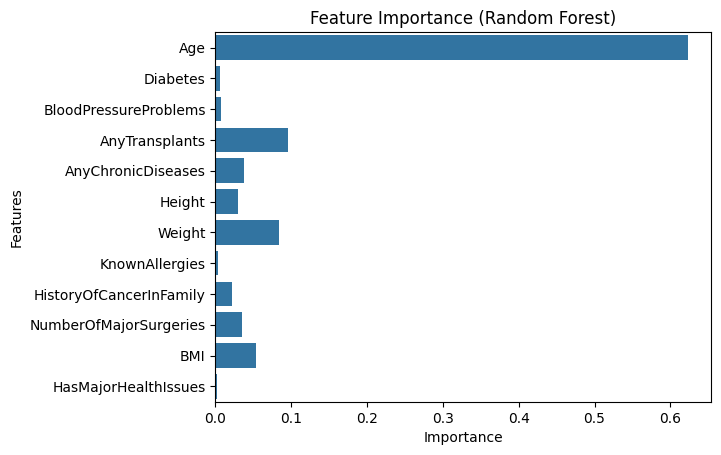

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()


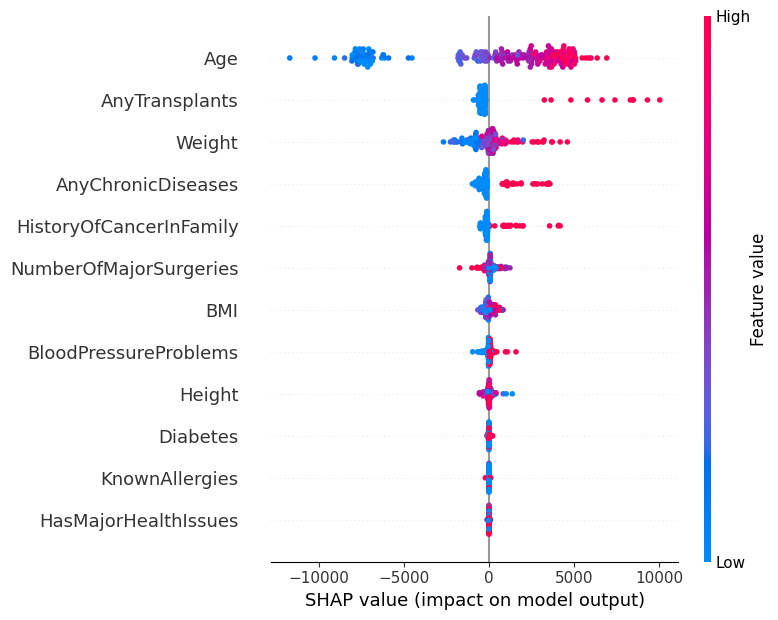

In [22]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)



**Actionable Business Insights**

**High-Risk Factors for Insurance Costs**:

Age, chronic diseases (diabetes, hypertension), and history of major surgeries significantly increase insurance costs.

Obesity-related factors (BMI, weight) are strong predictors of higher claims.

**Targeted Interventions:**

Offer wellness programs, preventive screenings, and lifestyle coaching to mitigate health risks.

Implement dynamic pricing models that adjust premiums based on health metrics.

Provide policy discounts for individuals actively managing chronic conditions or maintaining a healthy lifestyle.

In [ ]:
import pickle

# Assuming 'rf' is your trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [24]:
import pickle
# Save the trained model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(linear_model, file)

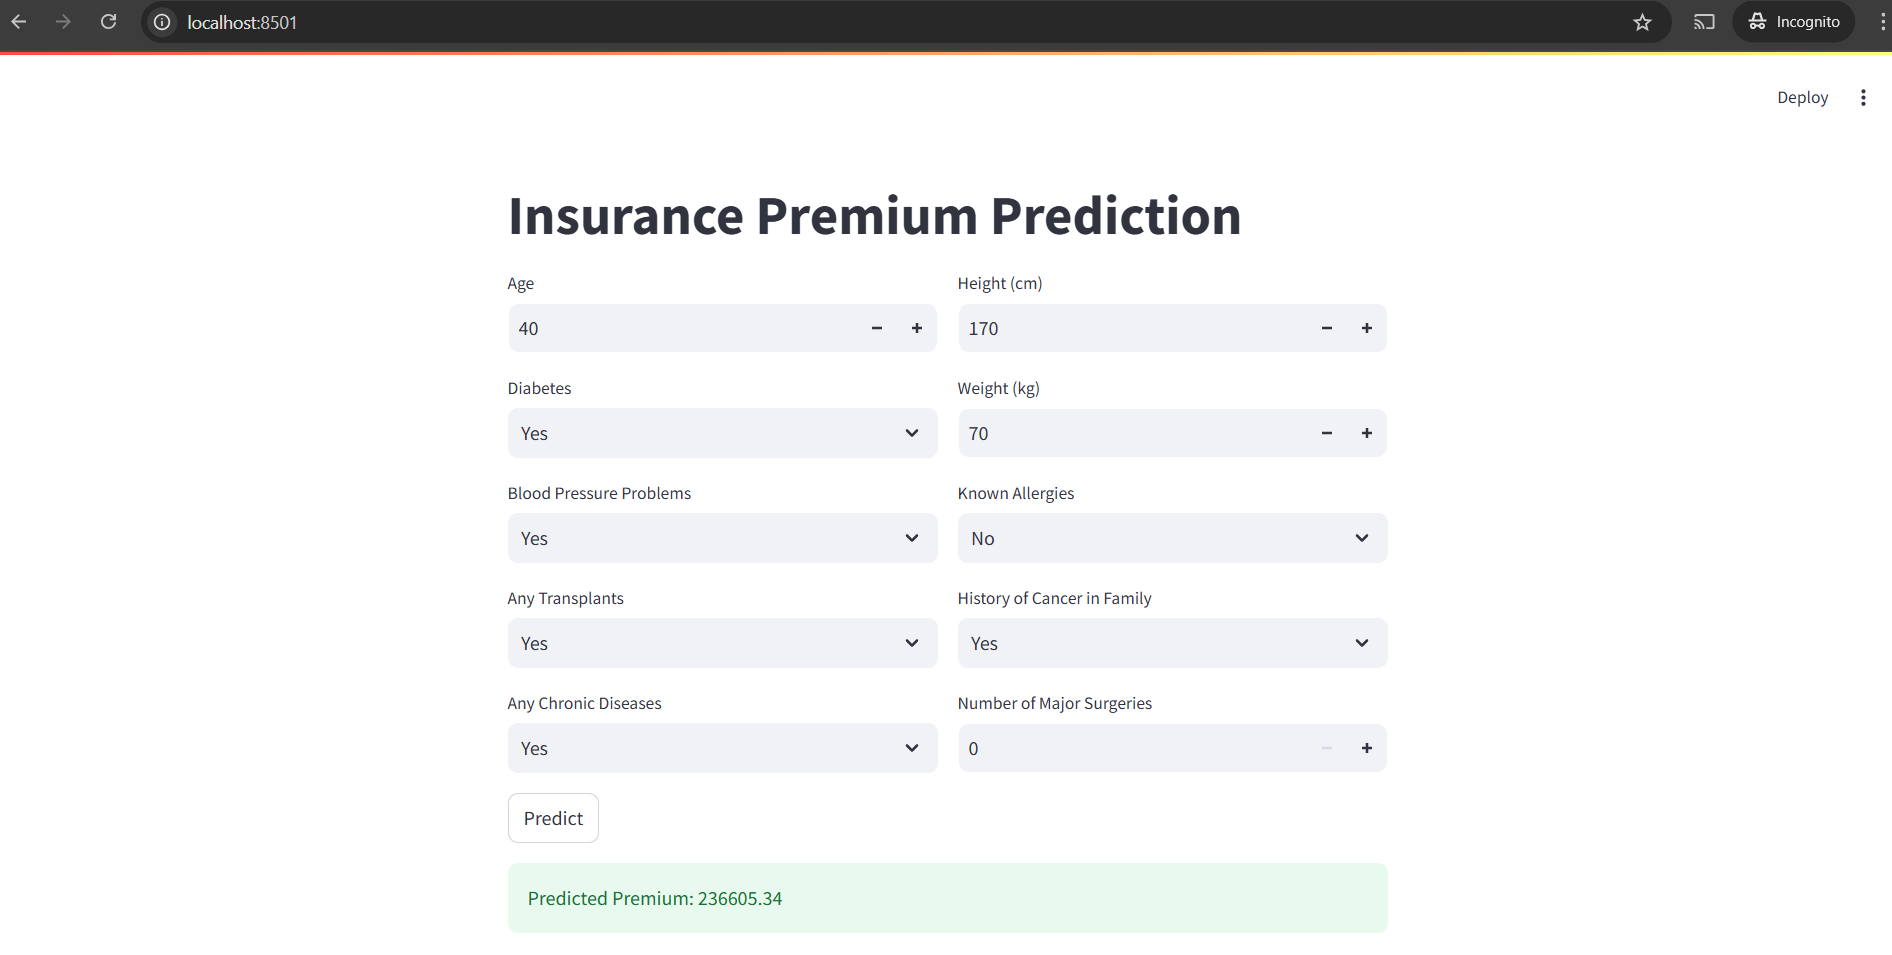